In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing


import re   
import nltk
nltk.download("stopwords")

%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cynar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
train_df = pd.read_csv('train_data.csv').dropna(subset=['text', 'sentiment'])
test_df = pd.read_csv('test_data.csv').dropna(subset=['text', 'sentiment'])
train_df.head()

,text,sentiment
0,lol get ideas far advance even june yet need t...,1
1,worst headache ever,0
2,sad wont see miss already yeah thats perfect c...,0
3,doesnt know spell conked,1
4,quotso stand one knows us wont get used wont g...,0


In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 32
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])


In [69]:
X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [82]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, GRU, Dense, Dropout, Input

max_words = 5000
max_len=50
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Build model
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_size))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='softmax'))

In [88]:
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 32
vocab_size = MAX_NUM_WORDS
max_len = MAX_SEQUENCE_LENGTH

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [93]:
from keras.metrics import Precision, Recall
from keras.optimizers import SGD


model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(momentum=0.8, decay=0.1/20, nesterov=False)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val, y_val)
)

C:\Users\cynar\Desktop\projects\sieci\venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning:

Argument `decay` is no longer supported and will be ignored.



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, 50, 32)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 50, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 64)             │        12,672 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,841 (686.88 KB)

 Trainable params: 175,841 (686.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.5262 - loss: 0.6907 - precision_5: 0.5263 - recall_5: 0.5550 - val_accuracy: 0.6950 - val_loss: 0.5929 - val_precision_5: 0.6724 - val_recall_5: 0.7562
Epoch 2/20
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - accuracy: 0.7297 - loss: 0.5433 - precision_5: 0.7196 - recall_5: 0.7542 - val_accuracy: 0.7666 - val_loss: 0.4876 - val_precision_5: 0.7503 - val_recall_5: 0.7967
Epoch 3/20
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 76s 19ms/step - accuracy: 0.7697 - loss: 0.4869 - precision_5: 0.7580 - recall_5: 0.7926 - val_accuracy: 0.7615 - val_loss: 0.4892 - val_precision_5: 0.7145 - val_recall_5: 0.8680
Epoch 4/20
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - accuracy: 0.7769 - loss: 0.4741 - precision_5: 0.7657 - recall_5: 0.7985 - val_accuracy: 0.7772 - val_loss: 0.4682 - val_precision_5: 0.7676 - val_recall_5: 0.7927
Epoch 5/20
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 80s 20ms/step - accuracy: 0.7808 - loss: 0.4677 - precision_5: 0.7702 

In [98]:
test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'\nDokładność na danych testowych: {test_acc:.4f}')

9953/9953 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7885 - loss: 0.4504 - precision_5: 0.7796 - recall_5: 0.8031


ValueError: too many values to unpack (expected 2)

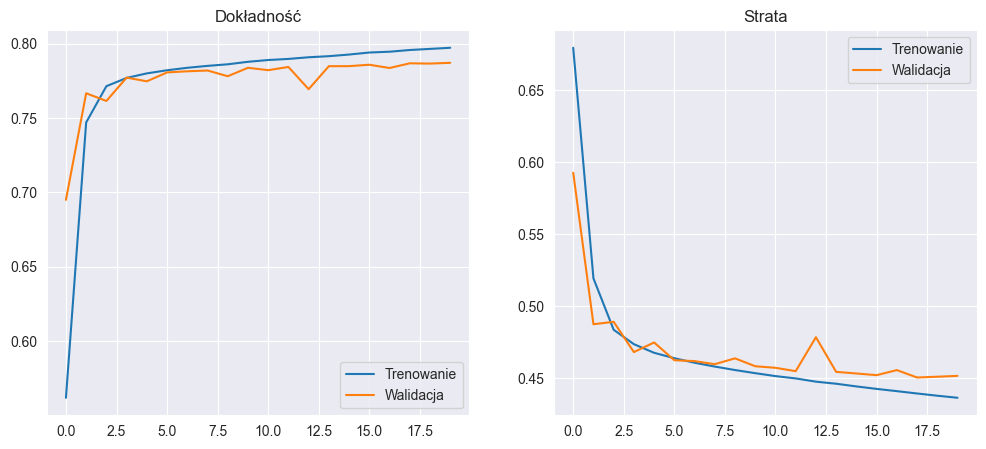

In [95]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trenowanie')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trenowanie')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.title('Strata')
plt.legend()

plt.show()

In [100]:
print(f'\nDokładność na danych testowych: {test_acc:.4f}')



Dokładność na danych testowych: 0.7820


9953/9953 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step


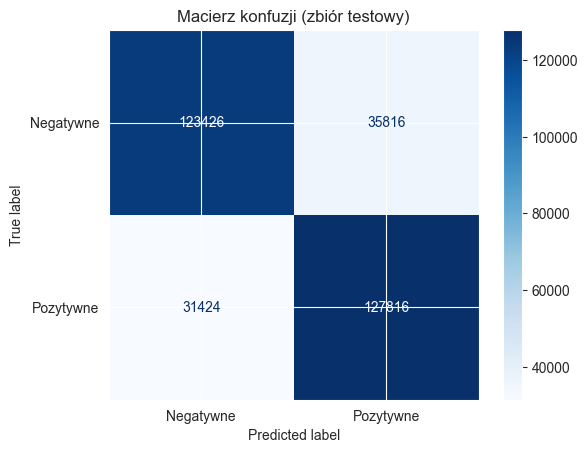

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatywne", "Pozytywne"])
disp.plot(cmap='Blues')
plt.title('Macierz konfuzji (zbiór testowy)')
plt.show()
